<a href="https://colab.research.google.com/github/Apple03244/Colaboratory/blob/main/wide%26deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import google.colab as colab
import pandas as pd

In [ ]:
method=colab.files
files=method.upload()

Saving sample_submission.csv to sample_submission.csv
Saving train.csv to train.csv


In [ ]:
data=pd.read_csv('/content/train.csv')

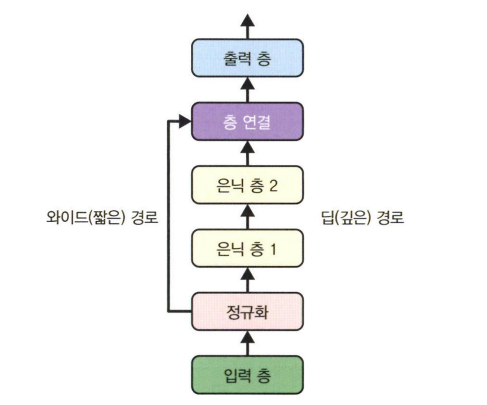

## Wide&Deep 경로 두가지 모두 충족시키는 모델

- 필요 이유 : 단순한 패턴과 복잡한 패턴을 모두 학습시키기가 가능해짐
- squance 모델만 이용할 경우 단순한 패턴까지도 모든 네트워크를 지나야하기 때문에 오히려 어려워질수 있음

In [ ]:
import tensorflow as ts
import sklearn.pipeline as skpip
import sklearn.model_selection as skmod
import sklearn.preprocessing as skpre
ts.random.set_seed(10)

In [ ]:
data["일시"]=data[["일시"]].apply(lambda x:pd.to_datetime(x))
use_data=data.fillna(0)
target='평균기온'
feature=use_data.columns.difference(["일시",target])

In [ ]:
train_data=use_data[use_data["일시"].apply(lambda x:x.year<2020)]
test_data=use_data[use_data["일시"].apply(lambda x:x.year>=2020)]

### step 1. 우선 모델을 만들어 이해해보자

In [ ]:
ts.random.set_seed(10)
nomalizer=ts.keras.layers.Normalization(input_shape=use_data.shape[1:])
hidden_layer1=ts.keras.layers.Dense(30,activation="relu")
hidden_layer2=ts.keras.layers.Dense(30,activation="relu")
concat_layer=ts.keras.layers.Concatenate()
output_layer=ts.keras.layers.Dense(1)

In [ ]:
input_=ts.keras.layers.Input(shape=[len(feature),]) # input 객체
nomal=nomalizer(input_)
hidden1=hidden_layer1(nomal)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([nomal,hidden2])
output=output_layer(concat)

In [ ]:
model=ts.keras.Model(inputs=[input_],outputs=[output])

In [ ]:
optimizer=ts.keras.optimizers.Adam(learning_rate=1e-6)
loss=ts.keras.losses.mae
model.compile(loss=loss,optimizer=optimizer,metrics=["RootMeanSquaredError"])

In [ ]:
nomalizer.adapt(train_data[feature]) # 평균과 분산을 줘야한다

In [ ]:
running_history=model.fit(x=train_data[feature],y=train_data[target],epochs=30,validation_data=[test_data[feature],test_data[target]])

Epoch 1/30
685/685 [==============================] - 4s 3ms/step - loss: 13.6423 - root_mean_squared_error: 16.1680 - val_loss: 14.4691 - val_root_mean_squared_error: 16.8595
Epoch 2/30
685/685 [==============================] - 2s 2ms/step - loss: 13.6246 - root_mean_squared_error: 16.1472 - val_loss: 14.4491 - val_root_mean_squared_error: 16.8362
Epoch 3/30
685/685 [==============================] - 2s 2ms/step - loss: 13.6069 - root_mean_squared_error: 16.1262 - val_loss: 14.4289 - val_root_mean_squared_error: 16.8127
Epoch 4/30
685/685 [==============================] - 2s 2ms/step - loss: 13.5889 - root_mean_squared_error: 16.1051 - val_loss: 14.4087 - val_root_mean_squared_error: 16.7891
Epoch 5/30
685/685 [==============================] - 1s 2ms/step - loss: 13.5709 - root_mean_squared_error: 16.0838 - val_loss: 14.3884 - val_root_mean_squared_error: 16.7655
Epoch 6/30
685/685 [==============================] - 1s 2ms/step - loss: 13.5529 - root_mean_squared_error: 16.0624 - v

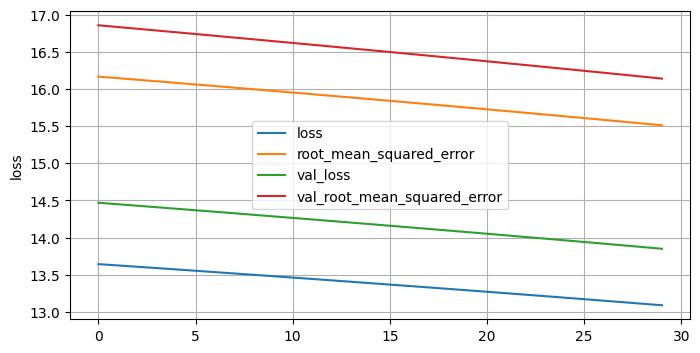

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
runned_data=pd.DataFrame(running_history.history)
plt.figure(figsize=(8,4))
for col in runned_data.columns:
  sb.lineplot(x=runned_data.index,y=runned_data[col],label=col)
plt.grid()
plt.show()

In [ ]:
import sklearn.metrics as skmet
pred_y=model.predict(x=test_data[feature])
skmet.mean_absolute_error(y_true=test_data[target],y_pred=pred_y)

35/35 [==============================] - 0s 3ms/step


13.849236224288203

Help on class Concatenate in module keras.layers.merging.concatenate:

class Concatenate(keras.layers.merging.base_merge._Merge)
 |  Concatenate(axis=-1, **kwargs)
 |  
 |  Layer that concatenates a list of inputs.
 |  
 |  It takes as input a list of tensors, all of the same shape except
 |  for the concatenation axis, and returns a single tensor that is the
 |  concatenation of all inputs.
 |  
 |  >>> x = np.arange(20).reshape(2, 2, 5)
 |  >>> print(x)
 |  [[[ 0  1  2  3  4]
 |    [ 5  6  7  8  9]]
 |   [[10 11 12 13 14]
 |    [15 16 17 18 19]]]
 |  >>> y = np.arange(20, 30).reshape(2, 1, 5)
 |  >>> print(y)
 |  [[[20 21 22 23 24]]
 |   [[25 26 27 28 29]]]
 |  >>> tf.keras.layers.Concatenate(axis=1)([x, y])
 |  <tf.Tensor: shape=(2, 3, 5), dtype=int64, numpy=
 |  array([[[ 0,  1,  2,  3,  4],
 |          [ 5,  6,  7,  8,  9],
 |          [20, 21, 22, 23, 24]],
 |         [[10, 11, 12, 13, 14],
 |          [15, 16, 17, 18, 19],
 |          [25, 26, 27, 28, 29]]])>
 |  
 |  >>> x1 = t